# ДЗ к уроку №8. Производные функций нескольких переменных.

## 1.       Найти область определения функции.

## z= [1-x^3]^0,5 + ln[y^2 - 1]


Область определения для x: (-oo < x) & (x <= 1)
Область определения для y: (-∞, -1) U (1, ∞)


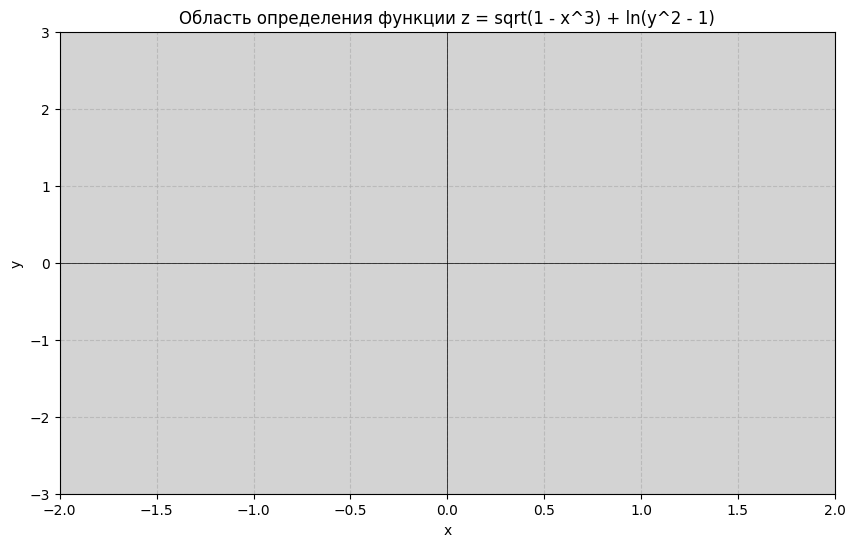

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, sqrt, log, And

# Определение переменных
x, y = symbols('x y')

# Условия области определения
cond1 = 1 - x**3 >= 0  # Подкоренное выражение должно быть >= 0
cond2 = y**2 - 1 > 0   # Выражение под логарифмом должно быть > 0

# Решение условий
solution_x = solve(cond1, x)
solution_y = solve([cond2], y)

print(f"Область определения для x: {solution_x}")
print(f"Область определения для y: (-∞, -1) U (1, ∞)")

# Создание сетки для значений x и y
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Вычисление выражений для областей определения
Z1 = 1 - X**3  # Подкоренное выражение
Z2 = Y**2 - 1  # Выражение под логарифмом

# Создание масок для условий
mask1 = Z1 >= 0
mask2 = Z2 > 0

# Построение графика областей определения
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, mask1 & mask2, levels=[0, 1], colors=['lightgrey', 'lightblue'])
plt.title('Область определения функции z = sqrt(1 - x^3) + ln(y^2 - 1)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## 2.       Найти производные 1-го порядка функции.

## z= [1 + (lnx / lny)]^3

In [4]:
from sympy import symbols, diff, ln

# Определение переменных
x, y = symbols('x y')

# Определение функции
z = (1 + (ln(x) / ln(y)))**3

# Частные производные
dz_dx = diff(z, x)
dz_dy = diff(z, y)

print(f"Частная производная по x: {dz_dx}")
print(f"Частная производная по y: {dz_dy}")

Частная производная по x: 3*(log(x)/log(y) + 1)**2/(x*log(y))
Частная производная по y: -3*(log(x)/log(y) + 1)**2*log(x)/(y*log(y)**2)


## 3.       Найти полный дифференциал функции в точке (1;1).

## z = [2xy + cos(x/y)]^0,5

In [5]:
from sympy import symbols, diff, cos, sin, sqrt

# Определение переменных
x, y = symbols('x y')

# Определение функции
z = sqrt(2*x*y + cos(x/y))

# Частные производные
dz_dx = diff(z, x)
dz_dy = diff(z, y)

# Значения частных производных в точке (1, 1)
dz_dx_at_1_1 = dz_dx.subs({x: 1, y: 1})
dz_dy_at_1_1 = dz_dy.subs({x: 1, y: 1})

print(f"Частная производная по x в точке (1, 1): {dz_dx_at_1_1}")
print(f"Частная производная по y в точке (1, 1): {dz_dy_at_1_1}")

# Полный дифференциал
print(f"Полный дифференциал: dz = ({dz_dx_at_1_1}) * dx + ({dz_dy_at_1_1}) * dy")

Частная производная по x в точке (1, 1): (1 - sin(1)/2)/sqrt(cos(1) + 2)
Частная производная по y в точке (1, 1): (sin(1)/2 + 1)/sqrt(cos(1) + 2)
Полный дифференциал: dz = ((1 - sin(1)/2)/sqrt(cos(1) + 2)) * dx + ((sin(1)/2 + 1)/sqrt(cos(1) + 2)) * dy


## 4.       Исследовать на экстремум функцию

## z = x^2 + xy + y^2 - 6x - 9y


In [7]:
from sympy import symbols, diff, hessian, solve, det

# Определение переменных
x, y = symbols('x y')

# Определение функции
z = x**2 + x*y + y**2 - 6*x - 9*y

# Частные производные первого порядка
dz_dx = diff(z, x)
dz_dy = diff(z, y)

# Нахождение критических точек
critical_points = solve((dz_dx, dz_dy), (x, y))
print(f"Критические точки: {critical_points}")

# Матрица Гессе
H = hessian(z, (x, y))
print(f"Матрица Гессе: {H}")

# Проверка в критической точке
H_at_critical = H.subs(critical_points)
print(f"Матрица Гессе в критической точке: {H_at_critical}")
print(f"Определитель Гессе в критической точке: {H_at_critical.det()}")

Критические точки: {x: 1, y: 4}
Матрица Гессе: Matrix([[2, 1], [1, 2]])
Матрица Гессе в критической точке: Matrix([[2, 1], [1, 2]])
Определитель Гессе в критической точке: 3


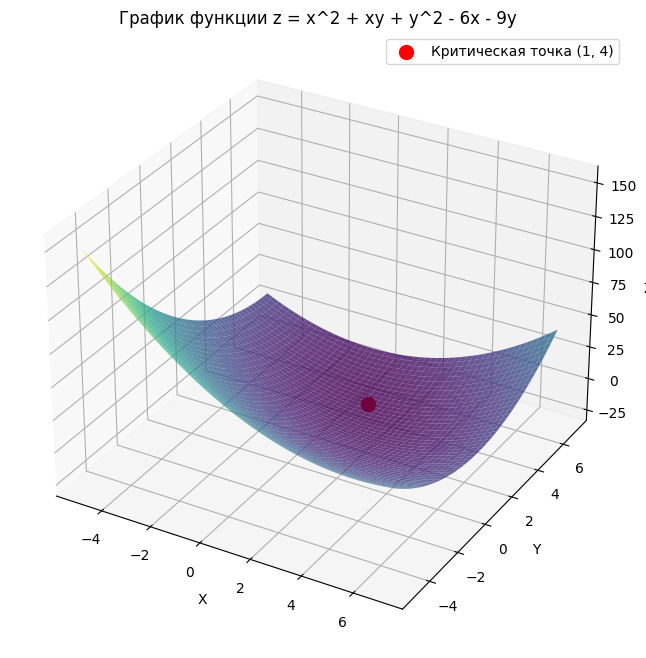

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Определение функции
def z(x, y):
    return x**2 + x*y + y**2 - 6*x - 9*y

# Создание сетки значений x и y
x = np.linspace(-5, 7, 400)
y = np.linspace(-5, 7, 400)
X, Y = np.meshgrid(x, y)
Z = z(X, Y)

# Критическая точка
x_critical, y_critical = 1, 4
z_critical = z(x_critical, y_critical)

# Построение графика
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение поверхности
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Добавление точки экстремума
ax.scatter(x_critical, y_critical, z_critical, color='red', s=100, label='Критическая точка (1, 4)')

# Настройка осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('График функции z = x^2 + xy + y^2 - 6x - 9y')
ax.legend()

plt.show()